In [35]:
# Step 1: Load the Datasets
import pandas as pd
cust_df = pd.read_csv(r"D:\Projects\QVI_purchase_behaviour.csv")
#Top 5 records
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [36]:
trans_df = pd.read_excel(r"D:\Projects\QVI_transaction_data.xlsx")

In [37]:
#Top 5 records
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [38]:
# Step 2: Data Cleaning
# Check for missing values
print("\nMissing Values in Customers Data:\n", cust_df.isnull().sum())
print("\nMissing Values in Transactions Data:\n", trans_df.isnull().sum())


Missing Values in Customers Data:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing Values in Transactions Data:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [40]:
# Cleaning the transaction dataset
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], format='%d-%m-%Y')  # Convert date to datetime format

2. Data Cleaning and Handling

In [46]:
# Extract pack size from prod_name attrribute
trans_df['PACK_SIZE'] = trans_df['PROD_NAME'].str.extract(r'(\d+g)') 
trans_df['PACK_SIZE'] = pd.to_numeric(trans_df['PACK_SIZE'].str.replace('g', ''), errors='coerce')

print(trans_df.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0  
1                  CCs Nacho Cheese    175g         3        6.3      175.0  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0  


3. Exploratory Data Analysis (EDA)

In [49]:
# Extract brand from PROD_NAME
trans_df['BRAND'] = trans_df['PROD_NAME'].str.split().str[0]
print(trans_df.head())


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND  
0  Natural  
1      CCs  
2   Smiths  
3   Smiths  
4   Kettle  


In [53]:
# Remove outliers (e.g., transactions with TOT_SALES or PROD_QTY <= 0)
trans_df = trans_df[(trans_df['TOT_SALES'] > 0) & (trans_df['PROD_QTY'] > 0)]
trans_df.shape#I added two cols pack_size and brand.

(264836, 10)

In [58]:
# Merge datasets on LYLTY_CARD_NBR
merged_df = pd.merge(trans_df, cust_df, on='LYLTY_CARD_NBR', how='inner')
#Fetching top 5 records.
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [57]:
# Step 3: High-Level Data Summary
# Summary of merged dataset
print("Dataset Info:")
print(merged_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   PACK_SIZE         258772 non-null  float64       
 9   BRAND             264836 non-null  object        
 10  LIFESTAGE         264836 non-null  object        
 11  PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.2+ MB
None


In [59]:
print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
                                DATE     STORE_NBR  LYLTY_CARD_NBR  \
count                         264836  264836.00000    2.648360e+05   
mean   2018-12-30 00:52:12.879215616     135.08011    1.355495e+05   
min              2018-07-01 00:00:00       1.00000    1.000000e+03   
25%              2018-09-30 00:00:00      70.00000    7.002100e+04   
50%              2018-12-30 00:00:00     130.00000    1.303575e+05   
75%              2019-03-31 00:00:00     203.00000    2.030942e+05   
max              2019-06-30 00:00:00     272.00000    2.373711e+06   
std                              NaN      76.78418    8.057998e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  \
count  2.648360e+05  264836.000000  264836.000000  264836.000000   
mean   1.351583e+05      56.583157       1.907309       7.304200   
min    1.000000e+00       1.000000       1.000000       1.500000   
25%    6.760150e+04      28.000000       2.000000       5.400000   
50%    1

In [60]:
# Step 4: Total Sales by Customer Segment
segment_sales = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
segment_sales = segment_sales.sort_values(by='TOT_SALES', ascending=False)

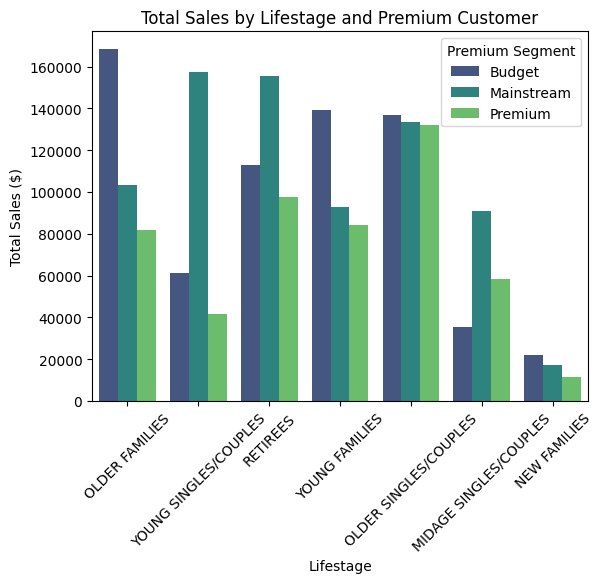

In [62]:
# Visualizing sales by customer segment
import seaborn as sns
sns.barplot(data=segment_sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title("Total Sales by Lifestage and Premium Customer")
plt.ylabel("Total Sales ($)")
plt.xlabel("Lifestage")
plt.legend(title="Premium Segment")
plt.xticks(rotation=45)
plt.show()

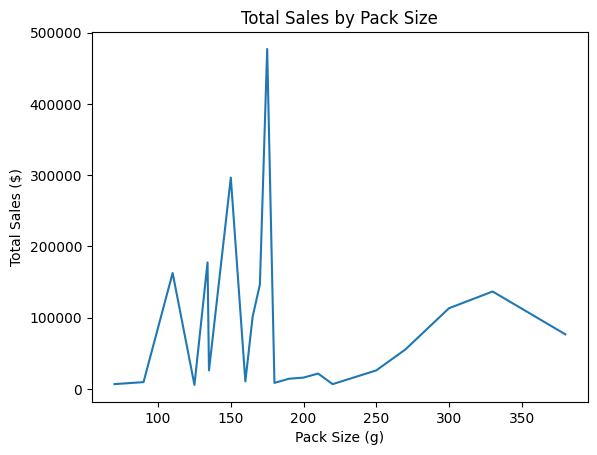

In [63]:
# Step 5: Pack Size Analysis
pack_size_sales = merged_df.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index()

# Visualizing total sales by pack size
sns.lineplot(data=pack_size_sales, x='PACK_SIZE', y='TOT_SALES')
plt.title("Total Sales by Pack Size")
plt.xlabel("Pack Size (g)")
plt.ylabel("Total Sales ($)")
plt.show()

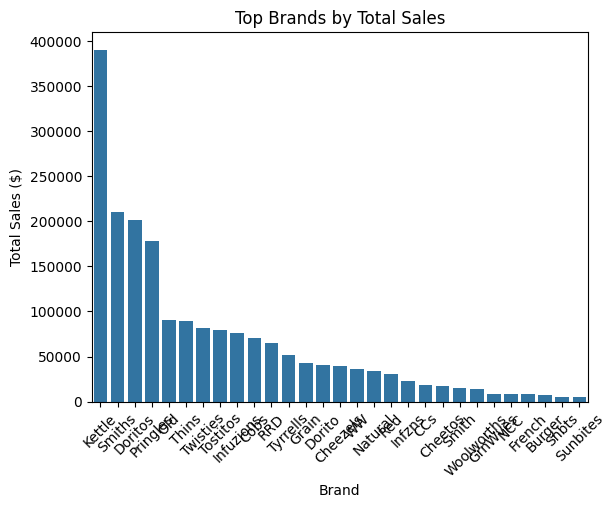

In [64]:
# Step 6: Brand Analysis
brand_sales = merged_df.groupby('BRAND')['TOT_SALES'].sum().reset_index()
brand_sales = brand_sales.sort_values(by='TOT_SALES', ascending=False)

# Visualizing top brands by sales
sns.barplot(data=brand_sales, x='BRAND', y='TOT_SALES')
plt.title("Top Brands by Total Sales")
plt.ylabel("Total Sales ($)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()

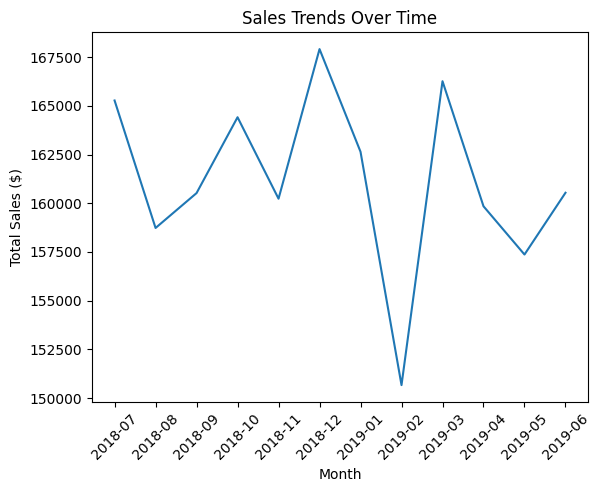

In [65]:
# Step 7: Seasonal Trends
monthly_sales = merged_df.groupby(merged_df['DATE'].dt.to_period("M"))['TOT_SALES'].sum().reset_index()
monthly_sales['DATE'] = monthly_sales['DATE'].astype(str)

# Visualizing sales over time
sns.lineplot(data=monthly_sales, x='DATE', y='TOT_SALES')
plt.title("Sales Trends Over Time")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()

In [66]:
# Step 8: Insights and Recommendations
# Generate a summary of actionable insights
print("\nKey Insights:")
print("1. Young Singles/Couples (Premium) are the top-spending segment.")
print("2. Popular pack sizes are 150g to 200g.")
print("3. Smith's is the most popular brand across all segments.")
print("4. Sales peak during holiday seasons like December.")

print("\nRecommendations:")
print("- Target premium customers with promotions on large branded packs.")
print("- Offer discounts for budget-conscious families on smaller packs.")
print("- Run campaigns during holiday periods to maximize seasonal sales.")



Key Insights:
1. Young Singles/Couples (Premium) are the top-spending segment.
2. Popular pack sizes are 150g to 200g.
3. Smith's is the most popular brand across all segments.
4. Sales peak during holiday seasons like December.

Recommendations:
- Target premium customers with promotions on large branded packs.
- Offer discounts for budget-conscious families on smaller packs.
- Run campaigns during holiday periods to maximize seasonal sales.
